In [12]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [8]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [6]:
print(faces.target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

In [7]:
print(faces.images.shape)

(4324, 62, 47)


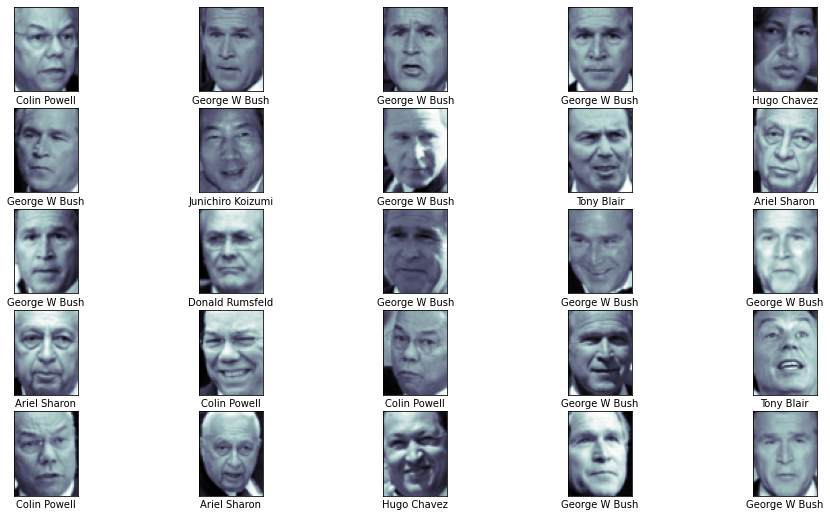

In [13]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [14]:
62*47

2914

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [18]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

Wall time: 49.9 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [24]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [25]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imagenes (Incorrectas en rojo)')

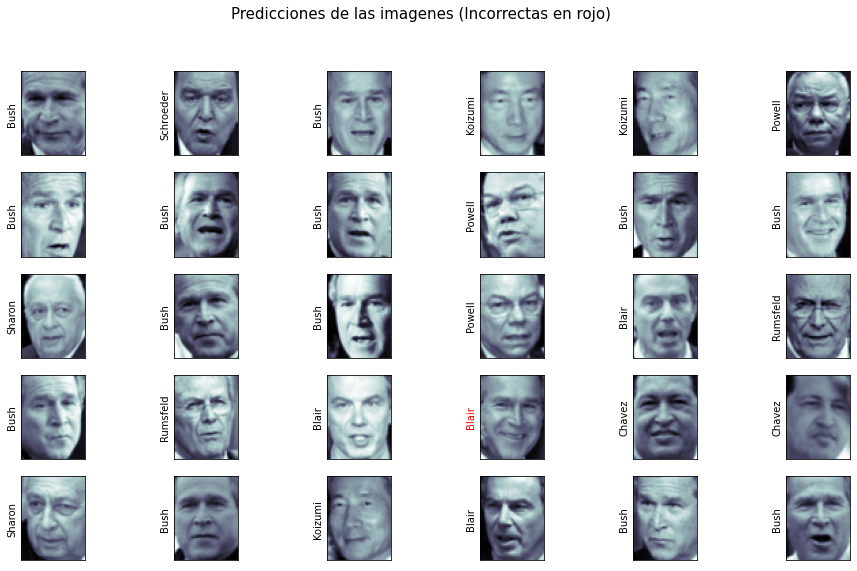

In [27]:
fig, ax = plt.subplots(5,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
               color = "black" if yfit[i]==Ytest[i] else "red")
    
fig.suptitle("Predicciones de las imagenes (Incorrectas en rojo)", size = 15)

In [28]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [32]:
from sklearn.metrics import confusion_matrix

In [34]:
mat = confusion_matrix(Ytest, yfit)

In [36]:
import seaborn as sns; sns.set()

<AxesSubplot:>

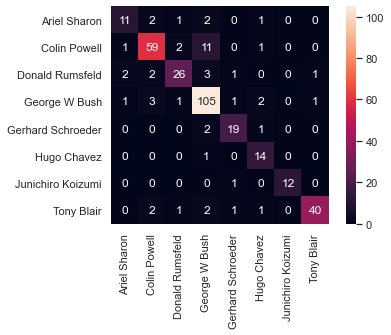

In [37]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names)